# Loading Standard libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url='F:\Edyoda_notes\data-science-complete-tutorial-master\Data\house_rental_data.csv.txt'
df=pd.read_csv(url)
df=df.drop('Unnamed: 0',axis=1)
df.head(10)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
5,1127.886,11,12,4,2,2,148000
6,1352.040,5,7,3,2,1,58000
7,757.854,5,14,1,0,1,48000
8,1152.792,10,12,3,2,2,45000
9,1423.200,4,5,4,2,2,65000


# Data Preprocessing

In [3]:
df.shape

(645, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [5]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [6]:
# The given data contain no missing values

In [7]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


<AxesSubplot:xlabel='Sqft', ylabel='Price'>

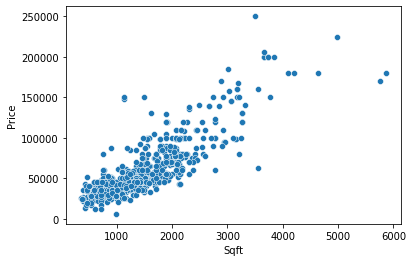

In [8]:
sns.scatterplot(x=df['Sqft'],y=df['Price'])

<AxesSubplot:xlabel='Bedroom', ylabel='count'>

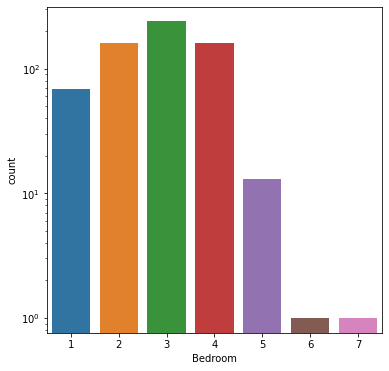

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['Bedroom'],log=True)

In [10]:
# Maximum house are with bedroom 3 

<AxesSubplot:xlabel='Bathroom', ylabel='count'>

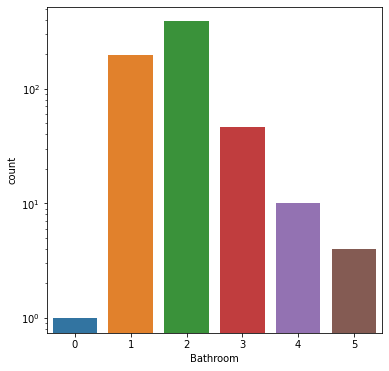

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['Bathroom'],log=True)

In [12]:
## Maximum number of houses has bathroom 2 and there are still some houses with 0 bathroom.

<AxesSubplot:xlabel='TotalFloor', ylabel='count'>

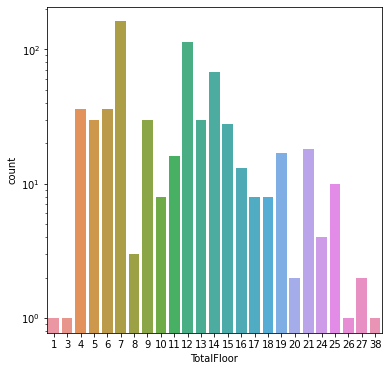

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['TotalFloor'],log=True)

In [14]:
## There are maximum 38 floors and the highest frequency of house is on floor 7.

<AxesSubplot:>

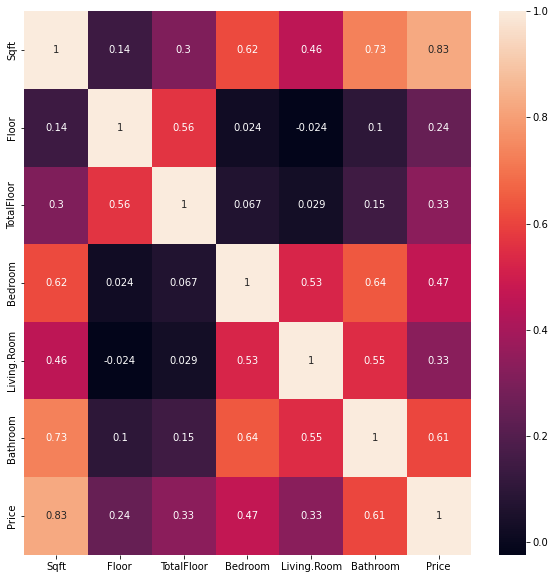

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [16]:
## As sqft area increases price of the house also increases.

# Seperating X and y

In [17]:
#x=df.drop(['Price'],axis=1)
x=df[['Sqft','Bedroom','Bathroom']]
y=df['Price']

# Divide the data into train set and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Feature Scaling and fitting the linear regression model to predict house price using make pipeline function

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
pipe=make_pipeline(StandardScaler(), LinearRegression())
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [20]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [21]:
y_pred=pipe.predict(X_test)

In [22]:
r2_score(y_pred, y_test)

0.5577149408854984

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
cvs=cross_val_score(pipe,x,y,cv=5)

In [25]:
cvs.mean()

0.6736877439072965

In [26]:
## The maximum accuracy using cross validation score is 67%